### Perform some simple data analysis on the dataset to better present it. 
Includes Time Series Analysis of Crime Incidents Over Time

Comparison of Crime Types Before, During, and After Ceasefires

Geographical Heatmap of Incidents

Weapon Usage in Crimes

Crime Incidents by District

Impact on Indoor vs. Outdoor Crimes


C:\Users\83494\AppData\Local\Temp\ipykernel_28188\3145834157.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['CrimeDate'] = pd.to_datetime(crime_data['CrimeDate'])


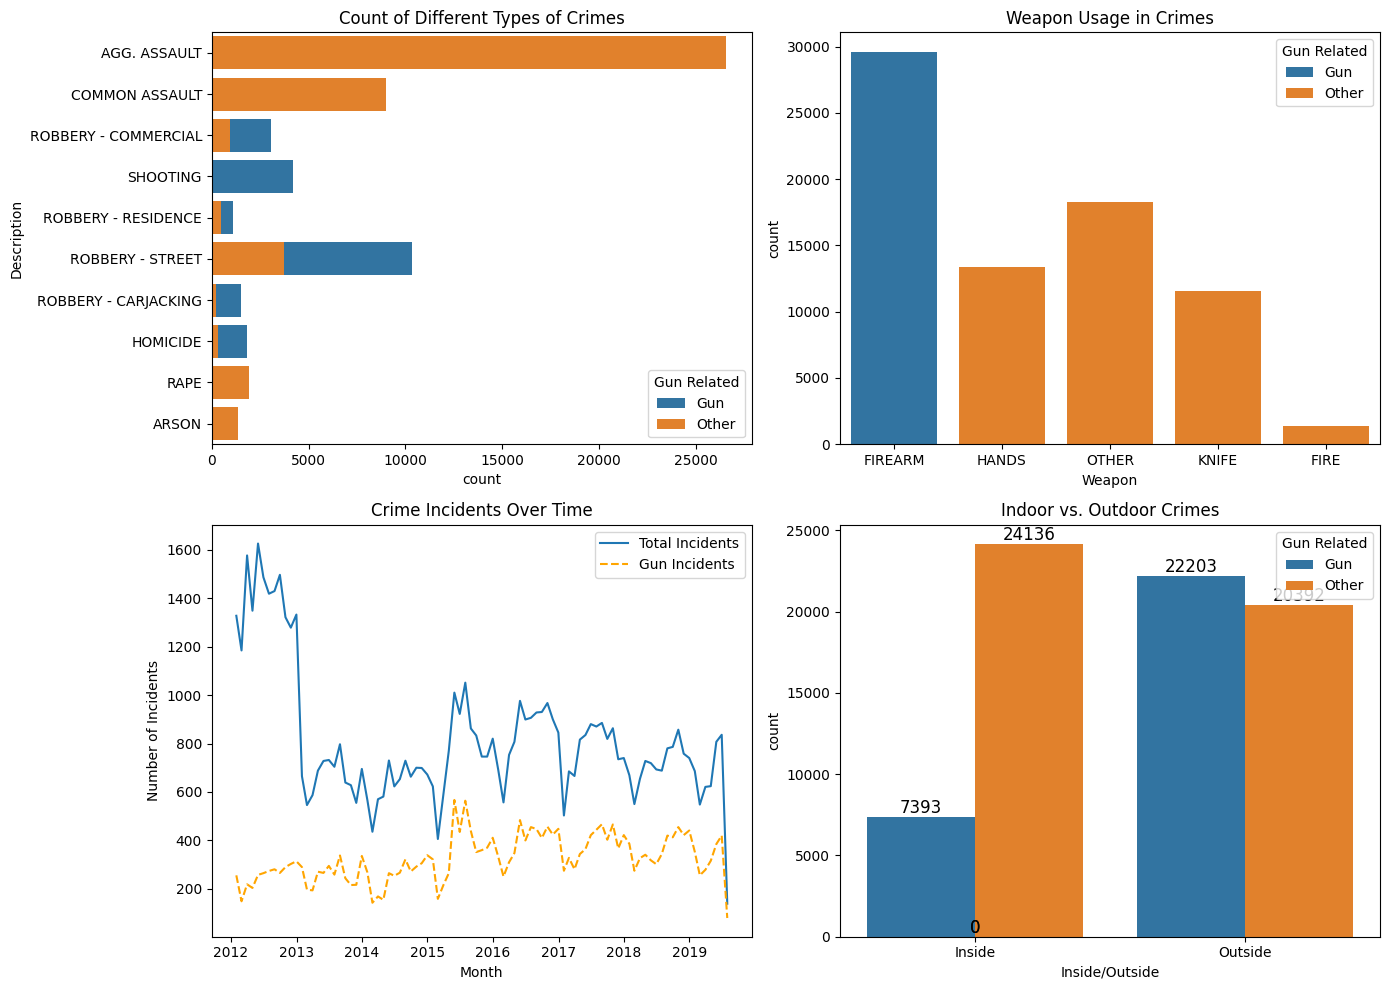

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
crime_data = pd.read_csv("BPD_Part_1_Victim_Based_Crime_Data.csv")
crime_data.dropna(subset=['CrimeDate', 'Inside/Outside', 'Weapon', 'District'], inplace=True)
crime_data['CrimeDate'] = pd.to_datetime(crime_data['CrimeDate'])
crime_data['Inside/Outside'] = crime_data['Inside/Outside'].replace({'I': 'Inside', 'O': 'Outside'})
crime_data.reset_index(inplace=True, drop=True)
crime_data['Gun Related'] = crime_data['Weapon'].apply(lambda x: 'Gun' if 'FIREARM' in str(x).upper() else 'Other')
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Count of different types of crimes (top-left)
sns.countplot(ax=axes[0, 0], data=crime_data, y='Description', hue='Gun Related', dodge=False)
axes[0, 0].set_title('Count of Different Types of Crimes')
axes[0, 0].legend(title='Gun Related', loc='best')
# Plot 4: Weapon Usage in Crimes (top-right)
sns.countplot(ax=axes[0, 1], data=crime_data, x='Weapon', hue='Gun Related', dodge=False)
axes[0, 1].set_title('Weapon Usage in Crimes')
axes[0, 1].legend(title='Gun Related', loc='best')

# Plot 5: Crime Incidents Over Time with a line for gun-related crimes
crime_data.set_index('CrimeDate', inplace=True)
total_incidents = crime_data.resample('M').size()
gun_incidents = crime_data[crime_data['Gun Related'] == 'Gun'].resample('M').size()

axes[1, 0].plot(total_incidents.index, total_incidents.values, label='Total Incidents')
axes[1, 0].plot(gun_incidents.index, gun_incidents.values, label='Gun Incidents', linestyle='--', color='orange')
axes[1, 0].set_title('Crime Incidents Over Time')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Incidents')
axes[1, 0].legend()

# Plot 6: Indoor vs. Outdoor Crimes with distinction for gun-related crimes
ax4 = sns.countplot(ax=axes[1, 1], data=crime_data, x='Inside/Outside', hue='Gun Related', order=['Inside', 'Outside'])
# Annotate each bar with the count
for p in ax4.patches:
    height = p.get_height()
    # Check for NaN because some bars may not be present for some categories
    if pd.notnull(height):
        ax4.text(p.get_x() + p.get_width() / 2., height, int(height),
                 ha="center", va="bottom", fontsize=12, color='black')
axes[1, 1].set_title('Indoor vs. Outdoor Crimes')


plt.tight_layout()
plt.show()


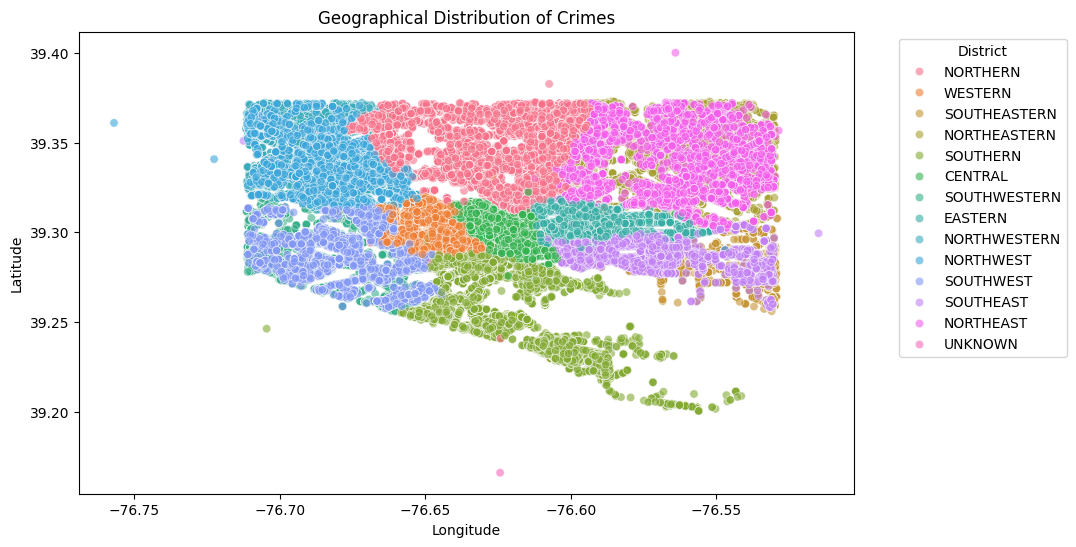

In [ ]:
# Visualization 3: Geographical Heatmap of Incidents
# Make sure the index is unique by resetting it if necessary
crime_data.reset_index(drop=True, inplace=True)

# Drop NaN values for plotting
crime_data.dropna(subset=['Longitude', 'Latitude'], inplace=True)

# Check for any NaN values in the 'District' column
crime_data['District'].dropna(inplace=True)

# Visualization: Scatterplot of Crime Incidents by Geographic Location
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=crime_data, 
    x='Longitude', 
    y='Latitude', 
    hue='District', 
    alpha=0.6
)
plt.title('Geographical Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()